In [1]:
import pandas as pd
import seaborn as sns
import warnings; warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../data/elearning_info.csv', index_col=0)
df.head()

,company_name,brazilian_visitors,hq_country,bounce_rate,visit_duration,male,female,18-24,25-34,35-44,45-54,55-64,65+
0,icould.com,-1,United Kingdom,0.336,1.0,0.537,0.463,0.225,0.310,0.197,0.133,0.082,0.052
1,engineeringmanagement.info,-1,United States,0.497,2.0,0.631,0.369,0.254,0.354,0.177,0.104,0.068,0.042
2,babbel.com,-1,Germany,0.539,3.0,0.513,0.487,0.239,0.288,0.178,0.132,0.094,0.068
3,management-academy.us,-1,- -,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,w3schools.com,1878030,Norway,0.520,5.0,0.748,0.252,0.277,0.375,0.186,0.089,0.046,0.026


In [3]:
df.dropna(inplace=True)

In [4]:
df.shape

(86, 13)

In [5]:
empresas_relevantes = df[df.brazilian_visitors != -1]
empresas_relevantes.shape

(17, 13)

In [6]:
empresas_relevantes

,company_name,brazilian_visitors,hq_country,bounce_rate,visit_duration,male,female,18-24,25-34,35-44,45-54,55-64,65+
4,w3schools.com,1878030,Norway,0.520,5.0,0.748,0.252,0.277,0.375,0.186,0.089,0.046,0.026
26,busuu.com,250240,United Kingdom,0.436,8.0,0.522,0.478,0.305,0.324,0.170,0.101,0.063,0.037
27,vitalsource.com,227500,United States,0.227,14.0,0.438,0.562,0.404,0.244,0.159,0.104,0.060,0.029
44,freecodecamp.org,782040,United States,0.649,5.0,0.758,0.242,0.268,0.379,0.186,0.090,0.049,0.028
46,uninove.br,2474500,Brazil,0.274,5.0,0.397,0.603,0.244,0.365,0.196,0.104,0.062,0.029
48,gofluent.com,49040,Switzerland,0.337,10.0,0.544,0.456,0.237,0.329,0.195,0.120,0.075,0.043
53,datascienceacademy.com.br,395136,Brazil,0.391,14.0,0.575,0.425,0.268,0.417,0.173,0.081,0.042,0.018
56,unipar.br,311619,Brazil,0.339,7.0,0.396,0.604,0.319,0.339,0.169,0.094,0.056,0.023
57,coursera.org,1756040,United States,0.360,11.0,0.557,0.443,0.286,0.353,0.177,0.098,0.055,0.032
60,openenglish.com,554600,United States,0.439,9.0,0.467,0.533,0.269,0.347,0.184,0.102,0.064,0.033


In [16]:
empresas_estrangeiras = empresas_relevantes[empresas_relevantes.hq_country != 'Brazil']
empresas_estrangeiras.reset_index(inplace=True)

# Analise de trafego

### Total de visitas mensais por brasileiros

In [17]:
empresas_estrangeiras.brazilian_visitors.sum()

12138644

### Bounce rate total

In [18]:
empresas_estrangeiras.bounce_rate.mean() * 100

46.075

### Duração média da visita

In [19]:
empresas_estrangeiras.visit_duration.mean()

7.583333333333333

# País sede da empresa

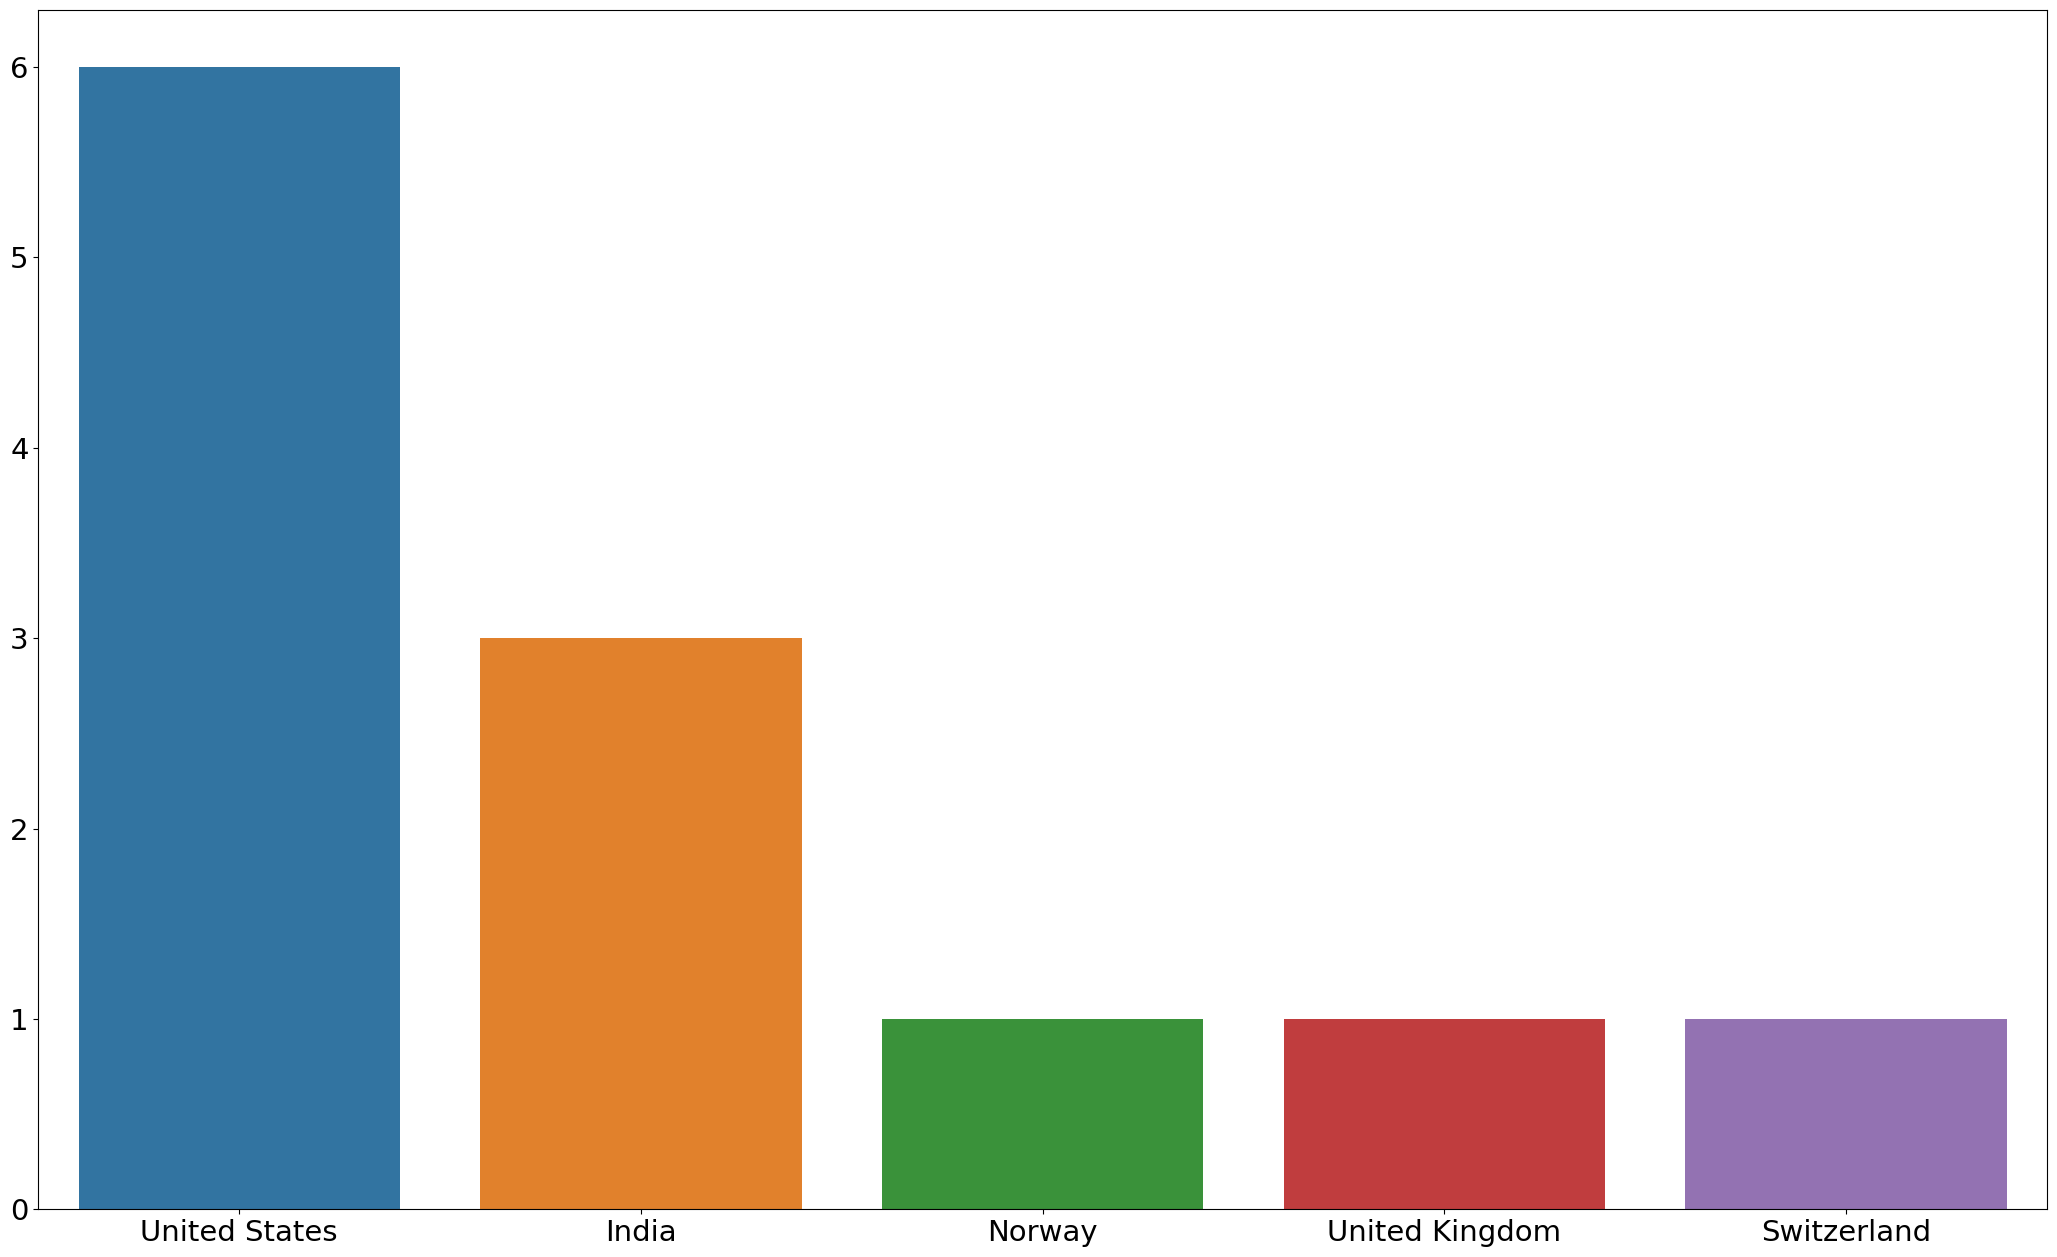

In [20]:
paises = empresas_estrangeiras.hq_country.value_counts()

plt.rcParams.update({'font.size': 21})
plt.figure(figsize=(21, 13))
sns.barplot(paises.keys(), paises.values)
plt.tight_layout();

# Demografia

### Sexo

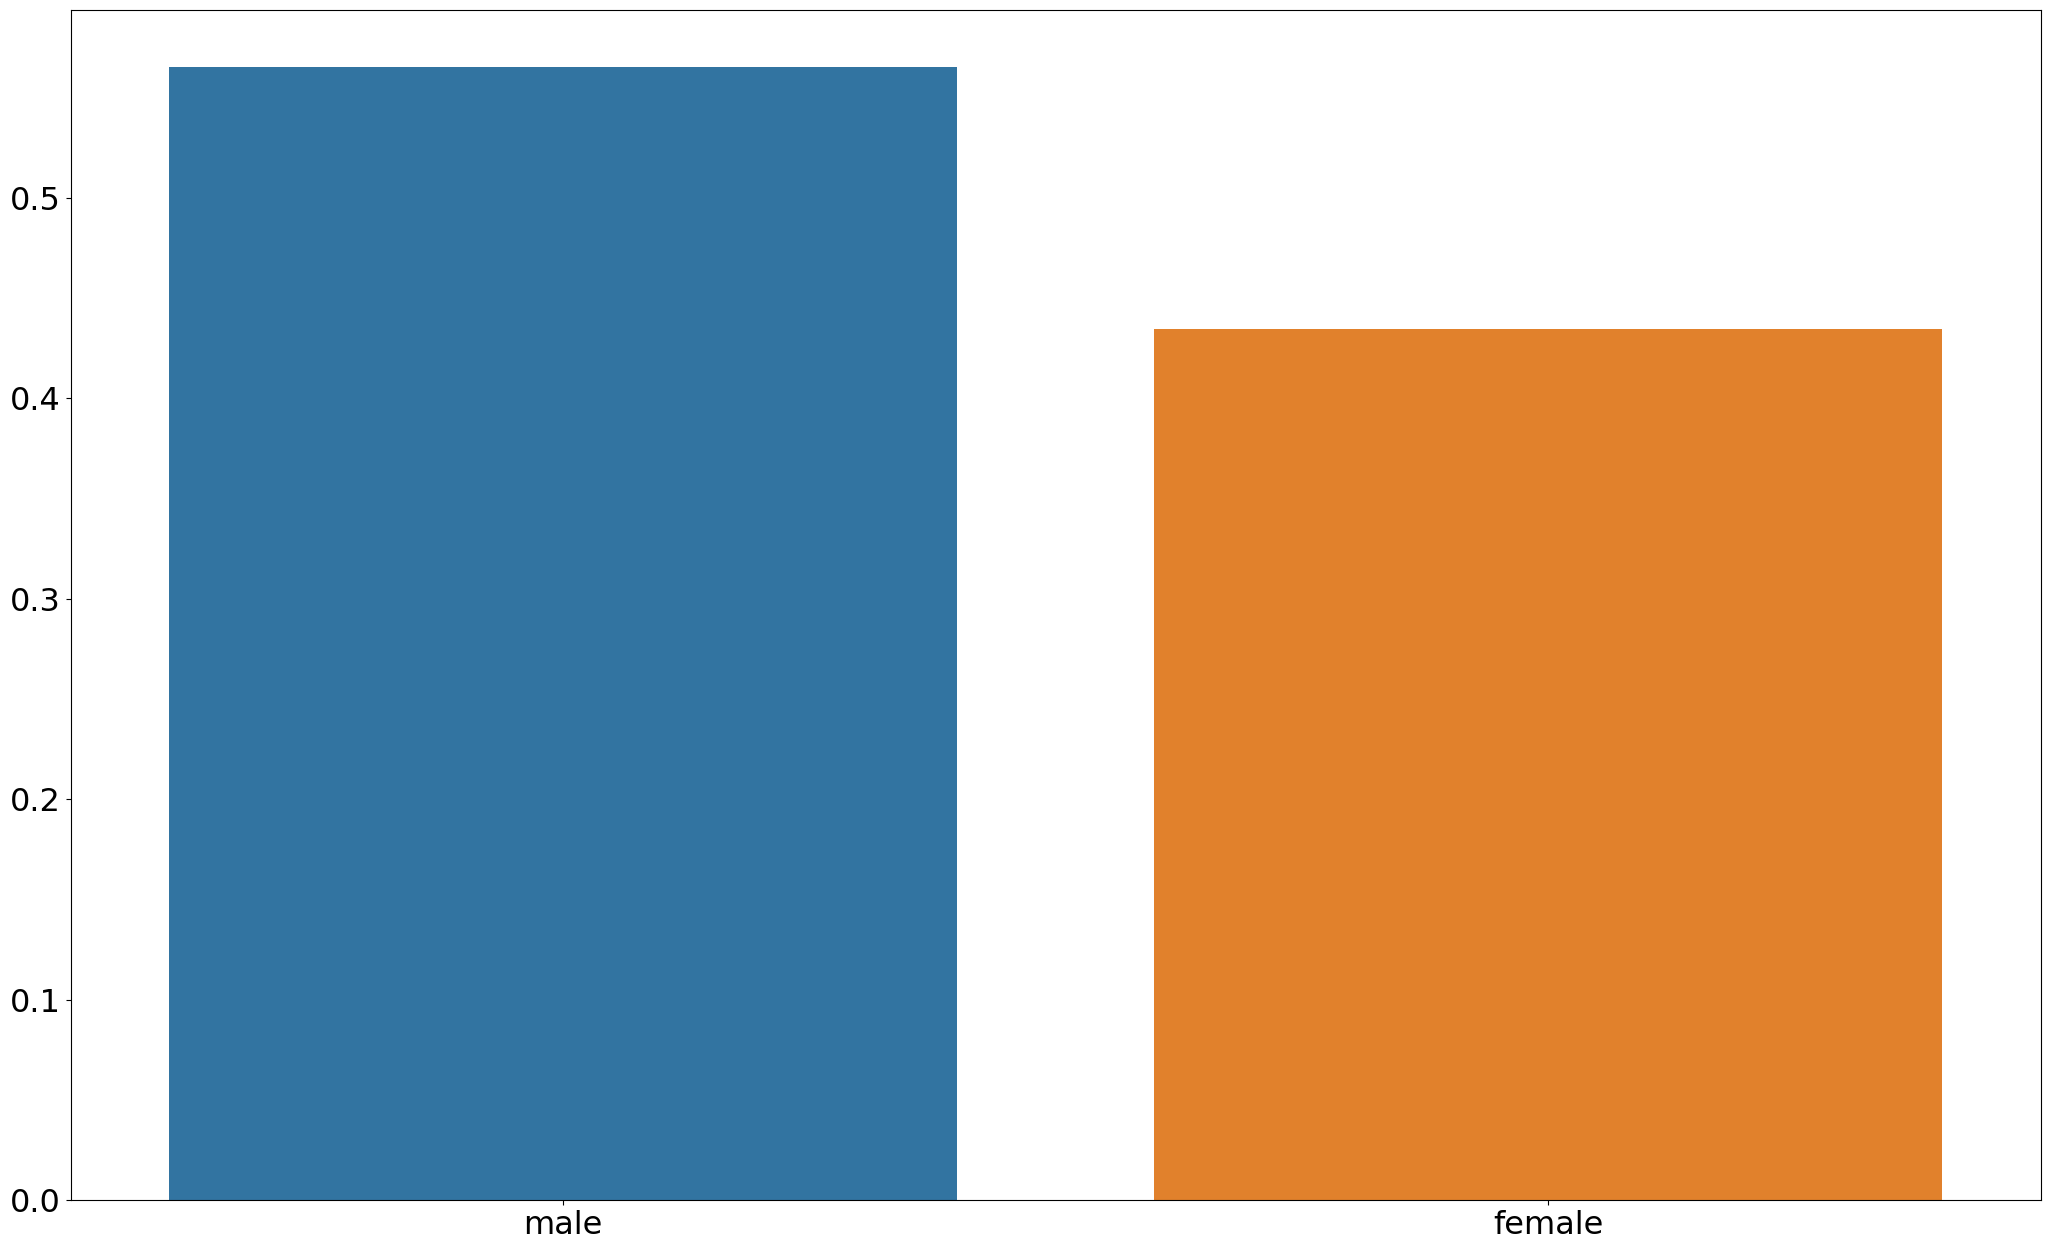

In [35]:
sexo = empresas_estrangeiras[['male', 'female']].mean()

plt.rcParams.update({'font.size': 23})
plt.figure(figsize=(21, 13))
sns.barplot(x=sexo.keys(), y=sexo.values)
plt.tight_layout();

### Idade

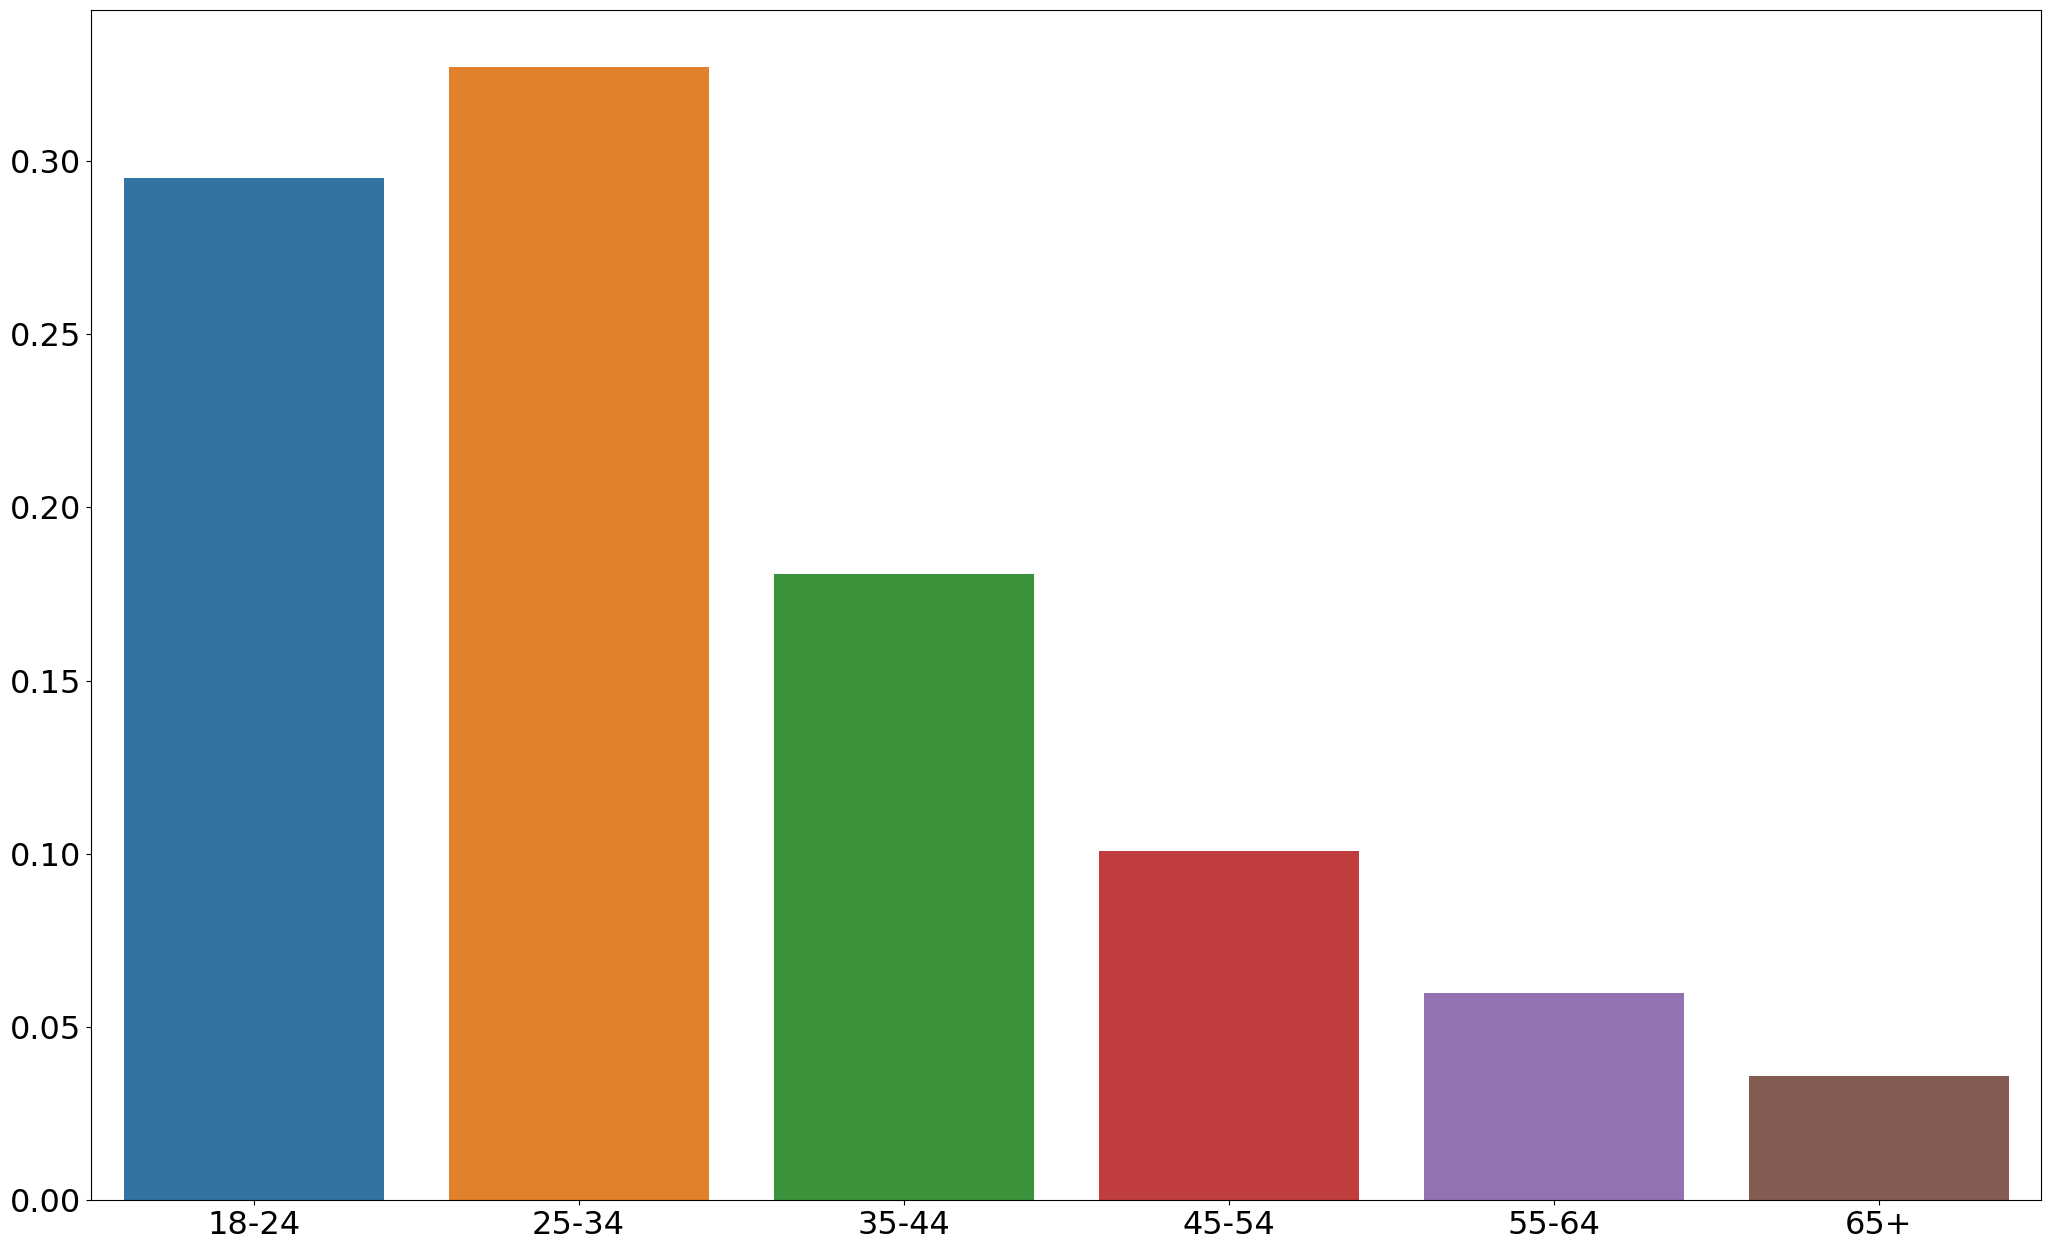

In [42]:
idade = empresas_estrangeiras[['18-24', '25-34', '35-44', '45-54', '55-64', '65+']]
idade = idade.mean()

plt.rcParams.update({'font.size': 23})
plt.figure(figsize=(21, 13))
sns.barplot(x=idade.keys(), y=idade.values)
plt.tight_layout();